In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import open3d as o3d

from utils import *

In [47]:
recording_dir = "/home/yunzhu/Documents/project_phystouch/phystouch/data_recording/data"
recording_dir = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/intrinsics_extrinsics/data/20210719_2/"

cameras = ["020122061233", "821312060044", "020122061651", "821312062243"]

intrinsics = Intrinsics(recording_dir)
extrinsics = Extrinsics(recording_dir)
rgbds = RGBD(recording_dir, recording="20210719_180040")
stitched_pcd = Stitching_pcds(intrinsics, extrinsics, rgbds, cameras)
apriltags = AprilTags(recording_dir, intrinsics, extrinsics, recording="20210719_180040", cameras=cameras)
stitched_pcd = Stitching_pcds(intrinsics, extrinsics, rgbds, cameras)

No AprilTag detected!


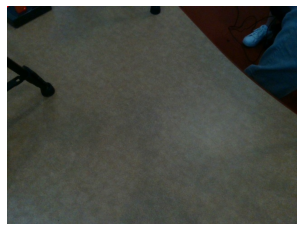

In [48]:
apriltags.image(idx="000450", camera="821312062243")

# Visible cameras

In [49]:
from collections import defaultdict

visible_cameras = defaultdict(list)

n= 1758

for i in range(0, n):
    idx = str(i).zfill(6)

    n_visibles = 0
    
    for camera in cameras:
        # Corner pixels
        corners_w = apriltags.corners_w(idx=idx, camera=camera)
        
        visible = 0 if corners_w is None else 1
        visible_cameras[camera].append(visible)
        
        n_visibles += visible
    
    visible_cameras['All'].append(n_visibles)

In [50]:
1 - visible_cameras['All'].count(0) / len(visible_cameras['All'])

0.7406143344709898

<AxesSubplot:>

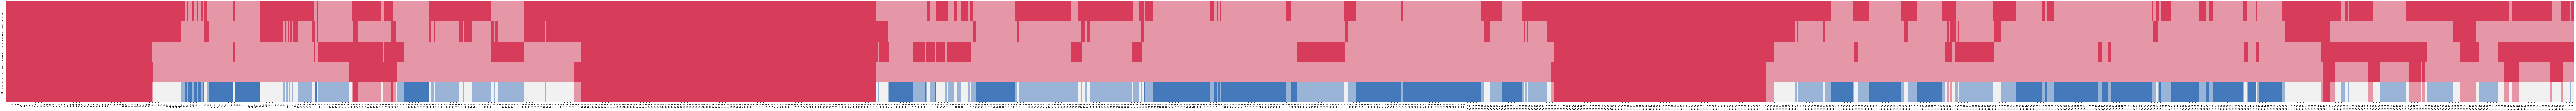

In [51]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(visible_cameras).T
cmap = sns.diverging_palette(5, 250, as_cmap=True)

fig = plt.figure(figsize=(200, 8))
ax = fig.add_subplot()

#df.style.background_gradient(cmap, axis=1)\
#    .set_properties(**{'max-width': '80px'})

sns.heatmap(df, annot=False,  
            cmap=cmap, cbar=False, ax=ax)